In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import gc
import pdet
import fpfs
import fitsio
from fpfs import pltutil
import numpy as np
import matplotlib.pylab as plt
import numpy.lib.recfunctions as rfn

ver='try2'
gver='basic2'
dver='cut16'
wrkDir=os.environ['homeWrk']
simDir=os.path.join(wrkDir,'FPFS2/sim/')

In [2]:
if False:
    nver='var7em3' # 'var0em0'#
    _i=2
    _a1=fitsio.read(os.path.join(simDir,'srcfs3_%sCenter-%s_%s/psf60/fpfs-%s-%04d-g1-0000.fits' %(gver,nver,ver,dver,_i)))
    print(np.max(np.abs(_a1['fpfs_v0']-(_a1['fpfs_f22']-_a1['fpfs_f23']))))
    print(np.max(np.abs(_a1['fpfs_v0r1']-(_a1['fpfs_f22r1']-_a1['fpfs_f23r1']))))
    print(np.max(np.abs(_a1['fpfs_v0r2']-(_a1['fpfs_f22r2']-_a1['fpfs_f23r2']))))
    print(np.max(np.abs(_a1['fpfs_v2']-(_a1['fpfs_f22']-_a1['fpfs_f32']))))
    print(np.max(np.abs(_a1['fpfs_v2r1']-(_a1['fpfs_f22r1']-_a1['fpfs_f32r1']))))
    print(np.max(np.abs(_a1['fpfs_v2r2']-(_a1['fpfs_f22r2']-_a1['fpfs_f32r2']))))
    print(np.max(np.abs(_a1['fpfs_v4']-(_a1['fpfs_f22']-_a1['fpfs_f21']))))
    print(np.max(np.abs(_a1['fpfs_v4r1']-(_a1['fpfs_f22r1']-_a1['fpfs_f21r1']))))
    print(np.max(np.abs(_a1['fpfs_v4r2']-(_a1['fpfs_f22r2']-_a1['fpfs_f21r2']))))
    print(np.max(np.abs(_a1['fpfs_v6']-(_a1['fpfs_f22']-_a1['fpfs_f12']))))
    print(np.max(np.abs(_a1['fpfs_v6r1']-(_a1['fpfs_f22r1']-_a1['fpfs_f12r1']))))
    print(np.max(np.abs(_a1['fpfs_v6r2']-(_a1['fpfs_f22r2']-_a1['fpfs_f12r2']))))

In [3]:
if True:
    nver='var7em3' # 'var0em0'#
    _i=2
    _a1=fitsio.read(os.path.join(simDir,'srcfs3_%sCenter-%s_%s/psf60/fpfs-%s-%04d-g1-0000.fits' %(gver,nver,ver,dver,_i)))

In [17]:
#nver='var1em9' # 'var0em0'#
nver='var0em0' # 'var0em0'#
# read noiseless data
mm1=[]
mm2=[]
for _i in range(1000):
    _a1=fitsio.read(os.path.join(simDir,'srcfs3_%sCenter-%s_%s/psf60/fpfs-%s-%04d-g1-0000.fits' %(gver,nver,ver,dver,_i)))
    _a2=fitsio.read(os.path.join(simDir,'srcfs3_%sCenter-%s_%s/psf60/fpfs-%s-%04d-g1-2222.fits' %(gver,nver,ver,dver,_i)))
    mm1.append(_a1)
    mm2.append(_a2)
    del _a1,_a2#,msk1,msk2
mm1 =   rfn.stack_arrays(mm1,usemask=False)
mm2 =   rfn.stack_arrays(mm2,usemask=False)
gc.collect()

7716

In [18]:
Const  =   4e-2
noirev =   False
ellM1  =   fpfs.catutil.fpfsM2E(mm1,const=Const,noirev=noirev)
ellM2  =   fpfs.catutil.fpfsM2E(mm2,const=Const,noirev=noirev)
gc.collect()

0

0.0
0.06
0.12
0.18
0.24
0.3
0.36
0.42


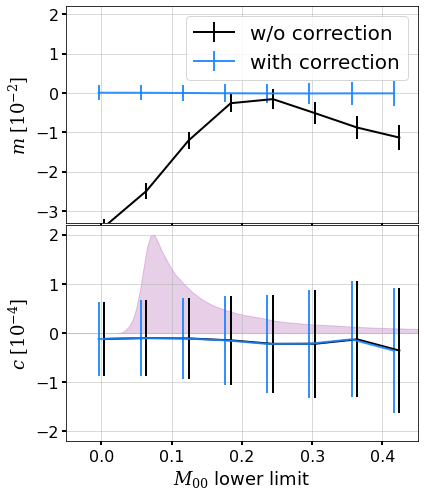

In [19]:
if False:
    del fs1,fs2
gc.collect()
use_sig=False
fs1=fpfs.base.Summary(mm1,ellM1,use_sig)
fs2=fpfs.base.Summary(mm2,ellM2,use_sig)

selnm=['detect','R2','M00']
dcc=0.06 # delta cut
cutB=0.
cutsig=[0.0015,0.08,0.08]

x=[]
y1=[];y2=[];yerr=[]
z1=[];z2=[];zerr=[]
for i in range(0,8):
    # clean outcome
    fs1.clear_outcomes()
    fs2.clear_outcomes()
    
    cut=cutB+dcc*i
    print(cut)
    cut=[0.003,cut/2.5,cut]
    # weight array
    fs1.update_selection_weight(selnm,cut,cutsig);fs2.update_selection_weight(selnm,cut,cutsig)
    fs1.update_selection_bias(selnm,cut,cutsig);fs2.update_selection_bias(selnm,cut,cutsig)
    fs1.update_ellsum();fs2.update_ellsum()
    de   = fs2.sumE1-fs1.sumE1
    eA   = (fs1.sumE1+fs2.sumE1)/2.
    eAR  = (fs1.sumE1+fs2.sumE1+fs1.corE1+fs2.corE1)/2.
    rave = (fs1.sumR1+fs2.sumR1)/2.
    raveR= (fs1.sumR1+fs2.sumR1+fs1.corR1+fs2.corR1)/2.
    x.append(cut[-1])
    y1.append(de/rave/0.04-1);y2.append(de/raveR/0.04-1)
    yerr.append(0.15*np.sqrt(np.sum((fs2.ell['fpfs_R1E']*fs2.ws)**2.))/raveR/0.04)
    z1.append(eA/rave);z2.append(eAR/rave)
    zerr.append(0.15*np.sqrt(np.sum((fs2.ell['fpfs_R1E']*fs2.ws)**2.))/raveR)
# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)
ax=axes[0]
xlabel='$M_{00}$ lower limit';
ax.errorbar(np.array(x)+0.004,np.array(y1)*1e2,np.array(yerr)*1e2,label='w/o correction',color=pltutil.colors[0])
ax.errorbar(np.array(x)-0.004,np.array(y2)*1e2,np.array(yerr)*1e2,label='with correction',color=pltutil.colors[1])
ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)
ax.set_xlim(-0.05,0.45)
ax.set_ylim(-3.3,2.2)
ax.tick_params(width=2,size=4)
hist,bins=np.histogram(fs1.mm['fpfs_M00'],range=(-0.05,0.46),bins=100,density=True)
cbin=(bins[1:]+bins[:-1])/2.
sf=hist.max()/2.
hist=hist/sf
ax.set_xticklabels([])
ax.grid()
ax.legend()

ax=axes[1]
ax.errorbar(np.array(x)+0.004,np.array(z1)*1e4,np.array(zerr)*1e4,label='w/o correction',color=pltutil.colors[0])
ax.errorbar(np.array(x)-0.004,np.array(z2)*1e4,np.array(zerr)*1e4,label='with correction',color=pltutil.colors[1])
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(-0.05,0.45)
ax.set_ylim(-2.2,2.2)
ax.tick_params(width=2,size=4)
ax.set_xlabel(xlabel,fontsize=18)
ax.fill_between(cbin,hist,color=pltutil.colors[-1],alpha=0.2)
ax.grid()

plt.tight_layout(h_pad=-0.2)

0.0
0.002
0.004
0.006
0.008
0.01
0.012
0.014


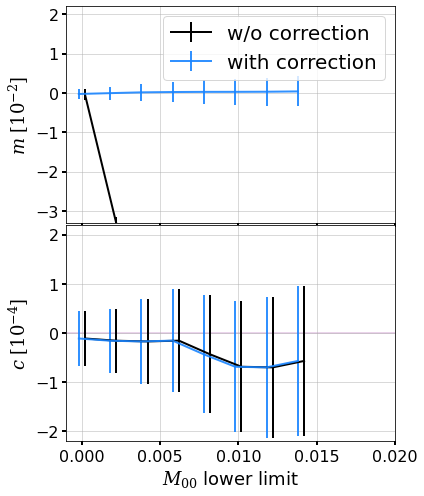

In [20]:
del fs1,fs2
gc.collect()
use_sig=False
fs1=fpfs.base.Summary(mm1,ellM1,use_sig)
fs2=fpfs.base.Summary(mm2,ellM2,use_sig)

selnm=['detect']
dcc=0.002 # delta cut
cutB=0.

x=[]
y1=[];y2=[];yerr=[]
z1=[];z2=[];zerr=[]
for i in range(0,8):
    # clean outcome
    fs1.clear_outcomes()
    fs2.clear_outcomes()
    
    cut=cutB+dcc*i
    print(cut)
    cutsig=[min(max(cut/1.2,0.001),0.008)]
    cut=[cut]
    # weight array
    fs1.update_selection_weight(selnm,cut,cutsig);fs2.update_selection_weight(selnm,cut,cutsig)
    fs1.update_selection_bias(selnm,cut,cutsig);fs2.update_selection_bias(selnm,cut,cutsig)
    fs1.update_ellsum();fs2.update_ellsum()
    de   = fs2.sumE1-fs1.sumE1
    eA   = (fs1.sumE1+fs2.sumE1)/2.
    eAR  = (fs1.sumE1+fs2.sumE1+fs1.corE1+fs2.corE1)/2.
    rave = (fs1.sumR1+fs2.sumR1)/2.
    raveR= (fs1.sumR1+fs2.sumR1+fs1.corR1+fs2.corR1)/2.
    x.append(cut[-1])
    y1.append(de/rave/0.04-1);y2.append(de/raveR/0.04-1)
    yerr.append(0.15*np.sqrt(np.sum((fs2.ell['fpfs_R1E']*fs2.ws)**2.))/raveR/0.04)
    z1.append(eA/rave);z2.append(eAR/rave)
    zerr.append(0.15*np.sqrt(np.sum((fs2.ell['fpfs_R1E']*fs2.ws)**2.))/raveR)
# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)
ax=axes[0]
xlabel='$M_{00}$ lower limit';
ax.errorbar(np.array(x)+2e-4,np.array(y1)*1e2,np.array(yerr)*1e2,label='w/o correction',color=pltutil.colors[0])
ax.errorbar(np.array(x)-2e-4,np.array(y2)*1e2,np.array(yerr)*1e2,label='with correction',color=pltutil.colors[1])
ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)

ax.set_xlim(-0.001,0.02)
ax.set_ylim(-3.3,2.2)

ax.tick_params(width=2,size=4)
hist,bins=np.histogram(fs1.mm['fpfs_M00'],range=(-0.05,0.46),bins=100,density=True)
cbin=(bins[1:]+bins[:-1])/2.
sf=hist.max()/2.
hist=hist/sf
ax.set_xticklabels([])
ax.grid()
ax.legend()

ax=axes[1]
ax.errorbar(np.array(x)+2e-4,np.array(z1)*1e4,np.array(zerr)*1e4,label='w/o correction',color=pltutil.colors[0])
ax.errorbar(np.array(x)-2e-4,np.array(z2)*1e4,np.array(zerr)*1e4,label='with correction',color=pltutil.colors[1])
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(-0.001,0.02)
ax.set_ylim(-2.2,2.2)
ax.tick_params(width=2,size=4)
ax.set_xlabel(xlabel,fontsize=18)
ax.fill_between(cbin,hist,color=pltutil.colors[-1],alpha=0.2)
ax.grid()

plt.tight_layout(h_pad=-0.2)

0.0
0.002
0.004
0.006
0.008
0.01
0.012
0.014


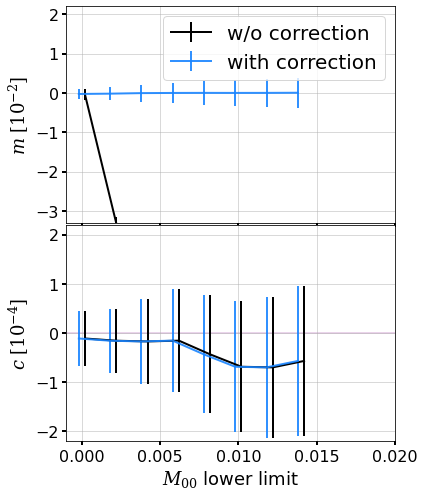

In [21]:
del fs1,fs2
gc.collect()
use_sig=False
fs1=fpfs.base.Summary(mm1,ellM1,use_sig)
fs2=fpfs.base.Summary(mm2,ellM2,use_sig)

selnm=['detect']
dcc=0.002 # delta cut
cutB=0.

x=[]
y1=[];y2=[];yerr=[]
z1=[];z2=[];zerr=[]
for i in range(0,8):
    # clean outcome
    fs1.clear_outcomes()
    fs2.clear_outcomes()
    
    cut=cutB+dcc*i
    print(cut)
    cutsig=[min(max(cut/1.2,0.001),0.008)]
    cut=[cut]
    # weight array
    fs1.update_selection_weight(selnm,cut,cutsig);fs2.update_selection_weight(selnm,cut,cutsig)
    fs1.update_selection_bias(selnm,cut,cutsig);fs2.update_selection_bias(selnm,cut,cutsig)
    fs1.update_ellsum();fs2.update_ellsum()
    de   = fs2.sumE1-fs1.sumE1
    eA   = (fs1.sumE1+fs2.sumE1)/2.
    eAR  = (fs1.sumE1+fs2.sumE1+fs1.corE1+fs2.corE1)/2.
    rave = (fs1.sumR1+fs2.sumR1)/2.
    raveR= (fs1.sumR1+fs2.sumR1+(fs1.corR1+fs1.corR2)/2.+(fs2.corR1+fs2.corR2)/2.)/2.
    x.append(cut[-1])
    y1.append(de/rave/0.04-1);y2.append(de/raveR/0.04-1)
    yerr.append(0.15*np.sqrt(np.sum((fs2.ell['fpfs_R1E']*fs2.ws)**2.))/raveR/0.04)
    z1.append(eA/rave);z2.append(eAR/rave)
    zerr.append(0.15*np.sqrt(np.sum((fs2.ell['fpfs_R1E']*fs2.ws)**2.))/raveR)
# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)
ax=axes[0]
xlabel='$M_{00}$ lower limit';
ax.errorbar(np.array(x)+2e-4,np.array(y1)*1e2,np.array(yerr)*1e2,label='w/o correction',color=pltutil.colors[0])
ax.errorbar(np.array(x)-2e-4,np.array(y2)*1e2,np.array(yerr)*1e2,label='with correction',color=pltutil.colors[1])
ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)

ax.set_xlim(-0.001,0.02)
ax.set_ylim(-3.3,2.2)

ax.tick_params(width=2,size=4)
hist,bins=np.histogram(fs1.mm['fpfs_M00'],range=(-0.05,0.46),bins=100,density=True)
cbin=(bins[1:]+bins[:-1])/2.
sf=hist.max()/2.
hist=hist/sf
ax.set_xticklabels([])
ax.grid()
ax.legend()

ax=axes[1]
ax.errorbar(np.array(x)+2e-4,np.array(z1)*1e4,np.array(zerr)*1e4,label='w/o correction',color=pltutil.colors[0])
ax.errorbar(np.array(x)-2e-4,np.array(z2)*1e4,np.array(zerr)*1e4,label='with correction',color=pltutil.colors[1])
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(-0.001,0.02)
ax.set_ylim(-2.2,2.2)
ax.tick_params(width=2,size=4)
ax.set_xlabel(xlabel,fontsize=18)
ax.fill_between(cbin,hist,color=pltutil.colors[-1],alpha=0.2)
ax.grid()

plt.tight_layout(h_pad=-0.2)

-0.002
0.002
0.006
0.01
0.014
0.018000000000000002
0.022
0.026000000000000002
[-0.00021812218236694214, 3.982956266179727e-05, 0.00048137668273584566, 0.00044026163876176305, 0.00037335452264297686, 0.0004490734574258415, 0.0002052485545951388, -8.054416772240724e-05]


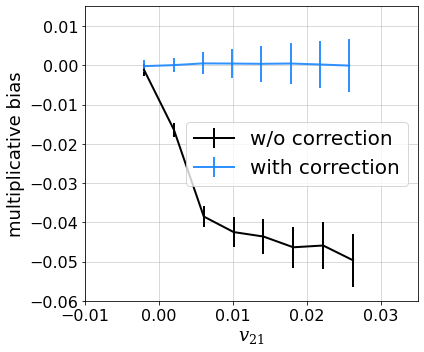

In [18]:
gc.collect()
selnm='fpfs_v23'
cornm='fpfs_R1Sv23'
scol1=det1[selnm]
scol2=det2[selnm]
ccol1=ellM1[cornm]
ccol2=ellM2[cornm]

dcc=0.004 # delta cut
cutB=-0.002 # 
cutsig=0.004
x=[];
y1=[];y2=[];yerr=[]
for i in range(0,8):
    # update cut array
    cut=cutB+dcc*i
    print(cut)
    ws1 = fpfs.catutil.get_wsel_eff(scol1,cut,cutsig,use_sig)
    ws2 = fpfs.catutil.get_wsel_eff(scol2,cut,cutsig,use_sig)
    cor1 = fpfs.catutil.get_wbias(scol1,cut,cutsig,use_sig,ws1,ccol1)
    cor2 = fpfs.catutil.get_wbias(scol2,cut,cutsig,use_sig,ws2,ccol2)
    de   = np.sum(ellM2['fpfs_e1']*ws2)-np.sum(ellM1['fpfs_e1']*ws1)
    rave = (np.sum(ellM2['fpfs_R1E']*ws2)+np.sum(ellM1['fpfs_R1E']*ws1))/2.
    raveR= (np.sum(ellM2['fpfs_R1E']*ws2)+np.sum(ellM1['fpfs_R1E']*ws1)+cor1+cor2)/2.
    x.append(cut)
    y1.append(de/rave/0.04-1)
    y2.append(de/raveR/0.04-1)
    yerr.append(0.15*np.sqrt(np.sum((ellM2['fpfs_R1E']*ws2)**2.))/raveR/0.04)

plt.close()
fig,axes=pltutil.make_figure_axes(1,1)
ax=axes[0]
ax.errorbar(np.array(x)*1.01,np.array(y1),np.array(yerr),label='w/o correction',color=pltutil.colors[0])
ax.errorbar(np.array(x)/1.01,np.array(y2),np.array(yerr),label='with correction',color=pltutil.colors[1])
xlabel='$v_{21}$'
ax.set_xlabel(xlabel)
ax.set_ylabel('multiplicative bias')
ax.set_xlim(-0.01,0.035)
ax.set_ylim(-0.06,0.015)
ax.grid()
ax.legend()
plt.tight_layout()
#fig.savefig('../../html/noisy_knownRef_%s.png' %pn)
print(y2)